# Notebook Title - Predicting Property Value using Scikit Learn and PyTorch

In this notebook, we will perform Property Value prediction on Buffalo Property Dataset.

We will perform model fitting using multiple approaches:

1) Simple Linear Regression using Scikit Learn

2) Ridge (L1) Linear Regression using Scikit Learn

3) Lasso (L2) Linear Regression using Scikit Learn

4) Simple Neural Network using PyTorch and Training Loop built from scratch

For this notebook we will use the dataset at data/Current_Assessment_Roll__2023-2024__20240205.csv, preprocess it and then train the models.

In [1]:
! pip install torchinfo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('data/Current_Assessment_Roll__2023-2024__20240205.csv')

In [4]:
df.head()

,SBL,Print Key,Address,Front,Depth,Tax District,Property Class Code,Prop Class Description,Previous Property Class,Previous Owner,...,Council District Abbreviation,Council District 2011,Police District,Census Tract,Census Block Group,Census Block,TRACTCE20,GEOID20_tract,GEOID20_blockgroup,GEOID20_block
0,1120900001001210,112.09-1-1.21,9999 NYC RR,0.0,0.0,147012,842.0,CEILING RAILROAD,842.0,NaN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
1,1005200003010110,100.52-3-10.11,13 FRENCH,27.0,135.0,147005,NaN,RESIDENTIAL VACANT LAND,NaN,NaN,...,MASTEN,MASTEN,District C,35.02,2,2000,003502,36029003502,360290035022,360290035022000
2,5550000012004000,555.00-12-4,34 SPECIAL FRANCHISE,0.0,0.0,147089,866.0,TELEPHONE - SPECIAL FRANCHISE,866.0,NaN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
3,5550000091020000,555.00-91-20,104 SPECIAL FRANCHISE,0.0,0.0,147089,NaN,TELEPHONE - SPECIAL FRANCHISE,NaN,NaN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
4,5550000091016000,555.00-91-16,100 SPECIAL FRANCHISE,0.0,0.0,147089,866.0,TELEPHONE - SPECIAL FRANCHISE,866.0,NaN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN


In [5]:
df.shape

(93682, 89)

In [6]:
df.describe()

,Front,Depth,Tax District,Property Class Code,Previous Property Class,Mail ZIpcode,Mail ZIpcode Extension,House Number,Zipcode,Zipcode Extension,...,Construction Quality Code,Exterior Wall Code,Fuel Type,Story Height,SWIS,Wall A,Wall B,Wall C,Latitude,Longitude
count,93681.000000,93681.000000,93682.000000,93475.000000,93475.000000,93420.000000,22088.000000,93682.000000,93630.000000,3.000000,...,93682.000000,67654.000000,8181.000000,93682.000000,93682.000000,93682.000000,93682.000000,93682.000000,93647.000000,93647.000000
mean,47.516505,119.559864,147008.335091,262.904627,262.904627,15032.662909,2065.803287,346.705002,14211.813276,1663.000000,...,0.170590,2.754338,2.007212,1.004803,147008.335091,3.983337,2.684251,1.874074,42.908640,-78.844551
std,337.244851,94.480410,3.960249,98.300025,98.300025,7795.568287,847.539507,1954.538820,5.040829,256.439077,...,0.567147,1.096655,0.111981,3.543157,3.960249,19.394131,16.009993,13.356549,0.032267,0.029970
min,0.000000,0.000000,147001.000000,210.000000,210.000000,140.000000,-422.000000,0.000000,14200.000000,1508.000000,...,0.000000,1.000000,1.000000,0.000000,147001.000000,0.000000,0.000000,0.000000,42.828200,-78.909803
25%,30.000000,102.000000,147005.000000,210.000000,210.000000,14204.000000,1440.000000,64.000000,14208.000000,1515.000000,...,0.000000,2.000000,2.000000,0.000000,147005.000000,0.000000,0.000000,0.000000,42.890054,-78.868638
50%,33.000000,115.000000,147009.000000,220.000000,220.000000,14211.000000,1940.000000,153.000000,14212.000000,1522.000000,...,0.000000,3.000000,2.000000,0.000000,147009.000000,0.000000,0.000000,0.000000,42.911947,-78.840928
75%,40.000000,132.000000,147011.000000,311.000000,311.000000,14216.000000,2533.000000,364.000000,14215.000000,1740.500000,...,0.000000,3.000000,2.000000,0.000000,147011.000000,0.000000,0.000000,0.000000,42.935293,-78.818610
max,97147.000000,15900.000000,147089.000000,971.000000,971.000000,99577.000000,9999.000000,99999.000000,14228.000000,1959.000000,...,4.000000,8.000000,4.000000,99.000000,147089.000000,100.000000,100.000000,100.000000,42.965904,-78.799051


In [7]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93682 entries, 0 to 93681
Data columns (total 89 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SBL                               93682 non-null  object 
 1   Print Key                         93682 non-null  object 
 2   Address                           93682 non-null  object 
 3   Front                             93681 non-null  float64
 4   Depth                             93681 non-null  float64
 5   Tax District                      93682 non-null  int64  
 6   Property Class Code               93475 non-null  float64
 7   Prop Class Description            93682 non-null  object 
 8   Previous Property Class           93475 non-null  float64
 9   Previous Owner                    74384 non-null  object 
 10  Owner1                            93682 non-null  object 
 11  Owner2                            24409 non-null  object 
 12  Mail

In [8]:
df_dropped = df[['Front', 'Depth', 'Tax District', 'Property Class Code', 'Prop Class Description', 'Previous Property Class','Zipcode','Year Built', 'Total Value', 'Land Value', 'Number of Units', 'Acres', 'First Story Area', 'Second Story Area', 'Add Area', 'Attic Area', 'Total Living Area', 'Overall Condition', 'Building Style Code', 'Building Style Description', 'Heat Type', 'Basement Type', '# of Stories', '# of Fireplaces', '# of Beds', '# of Baths', '# of Kitchens','Central Air','Construction Quality Code', 'Construction Grade', 'Exterior Wall Code','Homestead Code', 'Overall Condition Description', 'Story Height', 'SWIS', 'Wall A', 'Wall B', 'Wall C']]

In [9]:
df_dropped.head()

,Front,Depth,Tax District,Property Class Code,Prop Class Description,Previous Property Class,Zipcode,Year Built,Total Value,Land Value,...,Construction Quality Code,Construction Grade,Exterior Wall Code,Homestead Code,Overall Condition Description,Story Height,SWIS,Wall A,Wall B,Wall C
0,0.0,0.0,147012,842.0,CEILING RAILROAD,842.0,14212.0,NaN,635900,309400,...,0.0,NaN,NaN,N,NaN,0,147012,0,0,0
1,27.0,135.0,147005,NaN,RESIDENTIAL VACANT LAND,NaN,14211.0,NaN,1400,1400,...,0.0,NaN,NaN,H,NaN,0,147005,0,0,0
2,0.0,0.0,147089,866.0,TELEPHONE - SPECIAL FRANCHISE,866.0,14200.0,NaN,1186819,0,...,0.0,NaN,NaN,N,NaN,0,147089,0,0,0
3,0.0,0.0,147089,NaN,TELEPHONE - SPECIAL FRANCHISE,NaN,NaN,NaN,1616915,0,...,0.0,NaN,NaN,N,NaN,0,147089,0,0,0
4,0.0,0.0,147089,866.0,TELEPHONE - SPECIAL FRANCHISE,866.0,NaN,NaN,113455,0,...,0.0,NaN,NaN,N,NaN,0,147089,0,0,0


In [10]:
df_dropped.isna().sum()

Front                                1
Depth                                1
Tax District                         0
Property Class Code                207
Prop Class Description               0
Previous Property Class            207
Zipcode                             52
Year Built                       25933
Total Value                          0
Land Value                           0
Number of Units                      0
Acres                                1
First Story Area                     0
Second Story Area                    0
Add Area                             0
Attic Area                           0
Total Living Area                    0
Overall Condition                25933
Building Style Code              25933
Building Style Description       25933
Heat Type                        26000
Basement Type                    26114
# of Stories                         0
# of Fireplaces                      0
# of Beds                            0
# of Baths               

In [11]:
df_dropped.shape

(93682, 38)

In [12]:
df_dropped.dropna(inplace = True)

<ipython-input-12-de6f524c40c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.dropna(inplace = True)


In [13]:
df_dropped.shape

(67443, 38)

In [14]:
df_dropped.isna().sum()

Front                            0
Depth                            0
Tax District                     0
Property Class Code              0
Prop Class Description           0
Previous Property Class          0
Zipcode                          0
Year Built                       0
Total Value                      0
Land Value                       0
Number of Units                  0
Acres                            0
First Story Area                 0
Second Story Area                0
Add Area                         0
Attic Area                       0
Total Living Area                0
Overall Condition                0
Building Style Code              0
Building Style Description       0
Heat Type                        0
Basement Type                    0
# of Stories                     0
# of Fireplaces                  0
# of Beds                        0
# of Baths                       0
# of Kitchens                    0
Central Air                      0
Construction Quality

In [15]:
df_dropped.describe()

,Front,Depth,Tax District,Property Class Code,Previous Property Class,Zipcode,Year Built,Total Value,Land Value,Number of Units,...,# of Baths,# of Kitchens,Central Air,Construction Quality Code,Exterior Wall Code,Story Height,SWIS,Wall A,Wall B,Wall C
count,67443.000000,67443.000000,67443.000000,67443.000000,67443.000000,67443.000000,67443.000000,6.744300e+04,67443.000000,67443.000000,...,67443.000000,67443.000000,67443.000000,67443.000000,67443.000000,67443.000000,67443.000000,67443.000000,67443.0,67443.0
mean,37.292193,118.445866,147008.830805,217.634506,217.634506,14212.451552,1919.270169,1.116035e+05,15912.427620,0.000979,...,4.082781,1.445858,0.079386,0.000030,2.753347,0.000119,147008.830805,0.001483,0.0,0.0
std,14.410968,39.478795,3.593866,22.100765,22.100765,4.999568,29.433846,1.062022e+05,26746.847577,0.254141,...,1.354057,0.537785,0.270342,0.007701,1.093396,0.030805,3.593866,0.385063,0.0,0.0
min,0.000000,0.000000,147001.000000,210.000000,210.000000,14200.000000,1.000000,1.600000e+03,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,147001.000000,0.000000,0.0,0.0
25%,30.000000,105.000000,147006.000000,210.000000,210.000000,14208.000000,1900.000000,4.600000e+04,3800.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000,147006.000000,0.000000,0.0,0.0
50%,33.330000,115.000000,147009.000000,210.000000,210.000000,14213.000000,1920.000000,7.600000e+04,5800.000000,0.000000,...,4.000000,1.000000,0.000000,0.000000,3.000000,0.000000,147009.000000,0.000000,0.0,0.0
75%,40.000000,132.000000,147011.000000,220.000000,220.000000,14215.000000,1927.000000,1.390000e+05,15900.000000,0.000000,...,5.000000,2.000000,0.000000,0.000000,3.000000,0.000000,147011.000000,0.000000,0.0,0.0
max,352.650000,744.180000,147014.000000,642.000000,642.000000,14226.000000,2022.000000,1.747000e+06,461000.000000,66.000000,...,12.000000,4.000000,1.000000,2.000000,8.000000,8.000000,147014.000000,100.000000,0.0,0.0


In [16]:
df_dropped.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67443 entries, 10 to 93681
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Front                          67443 non-null  float64
 1   Depth                          67443 non-null  float64
 2   Tax District                   67443 non-null  int64  
 3   Property Class Code            67443 non-null  float64
 4   Prop Class Description         67443 non-null  object 
 5   Previous Property Class        67443 non-null  float64
 6   Zipcode                        67443 non-null  float64
 7   Year Built                     67443 non-null  float64
 8   Total Value                    67443 non-null  int64  
 9   Land Value                     67443 non-null  int64  
 10  Number of Units                67443 non-null  int64  
 11  Acres                          67443 non-null  float64
 12  First Story Area               67443 non-null

In [17]:
df_dropped['Prop Class Description'].unique()

array(['ONE FAMILY DWELLING', 'TWO FAMILY DWELLING',
       'MULTIPLE RESIDENCES', 'THREE FAMILY DWELLING', 'APARTMENT',
       'RESIDENCE WITH COMMERCIAL USE', 'RESIDENTIAL VACANT LAND',
       'SINGLE FAMILY W/ APARTMENT', 'CONVERTED RESIDENCE',
       'ALL OTHER HEALTH FACILITIES', 'COMMERCIAL VACANT LAND'],
      dtype=object)

In [18]:
df_dropped['Building Style Description'].unique()

array(['Ranch', 'Old style', 'Cape cod', 'Colonial', 'Other style',
       'Bungalow', 'Townhouse', 'Mansion', 'Raised ranch', 'Duplex',
       'Cottage', 'Split level', 'Row', 'Contemporary', "Manuf'd Housing"],
      dtype=object)

In [19]:
df_dropped['Construction Grade'].unique()

array(['C', 'D', 'B', 'A', 'E'], dtype=object)

In [20]:
df_dropped['Homestead Code'].unique()

array(['H', 'N'], dtype=object)

In [21]:
df_dropped['Overall Condition Description'].unique()

array(['Good', 'Normal', 'Fair', 'Poor', 'Excellent'], dtype=object)

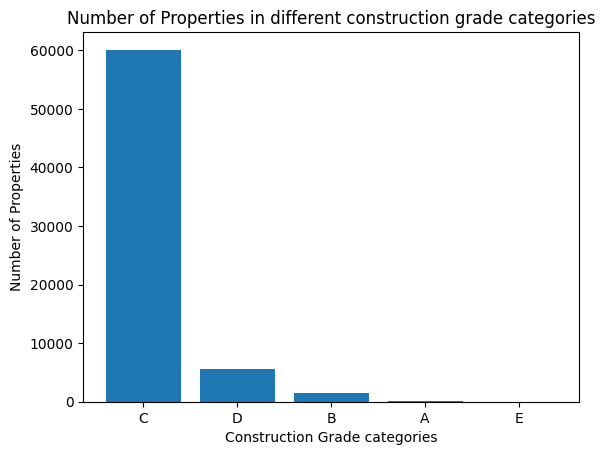

In [22]:
'''
Plot of number of properties in different construction grade categories
'''
plt.bar(df_dropped['Construction Grade'].unique(),df_dropped['Construction Grade'].value_counts())
plt.title("Number of Properties in different construction grade categories")
plt.xlabel("Construction Grade categories")
plt.ylabel("Number of Properties")
plt.show()

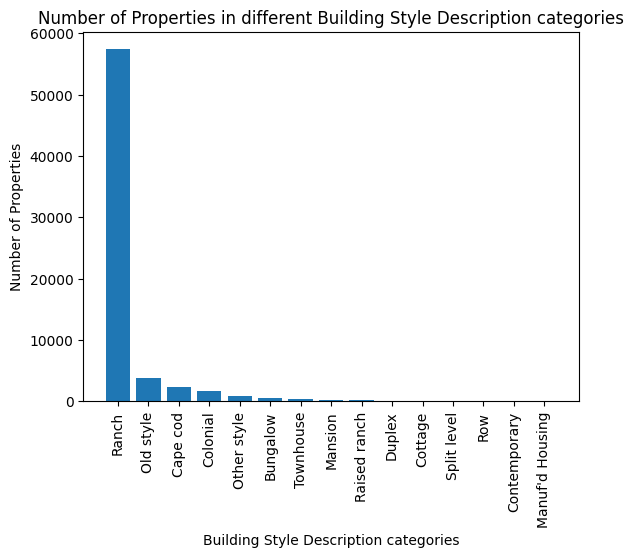

In [23]:
'''
Plot of number of properties in different Building Style Description categories
'''
plt.bar(df_dropped['Building Style Description'].unique(),df_dropped['Building Style Description'].value_counts())
plt.title("Number of Properties in different Building Style Description categories")
plt.xlabel("Building Style Description categories")
plt.xticks(rotation = 'vertical')
plt.ylabel("Number of Properties")
plt.show()

[]

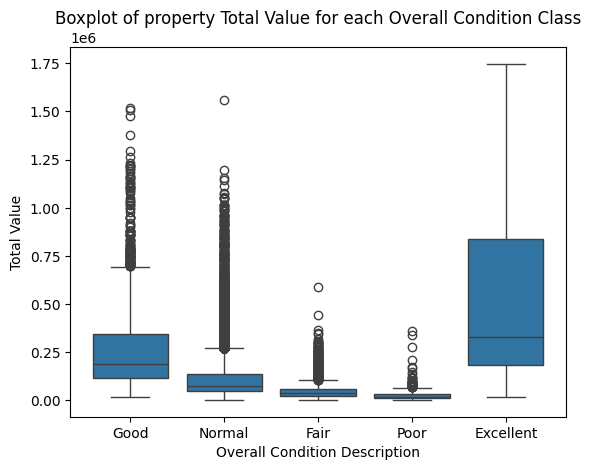

In [24]:
sb.boxplot(x = 'Overall Condition Description', y = 'Total Value', data = df_dropped)
plt.title("Boxplot of property Total Value for each Overall Condition Class")
plt.plot()

In [25]:
#Outlier Removal
def outlierArray(df, colName, alpha = 1.5):
    Q1 = df[colName].quantile(0.25)
    Q3 = df[colName].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - alpha*IQR
    upper = Q3 + alpha*IQR

    outlierArray = df[(df[colName] < lower) | (df[colName] > upper)]

    return outlierArray

In [26]:
def outlierRemoval(df, cols, alpha = 1.5):
    for col in cols:
        outlierIndex = outlierArray(df, col, alpha)
        df.loc[outlierIndex.index, col] = df[col].median()
    return df

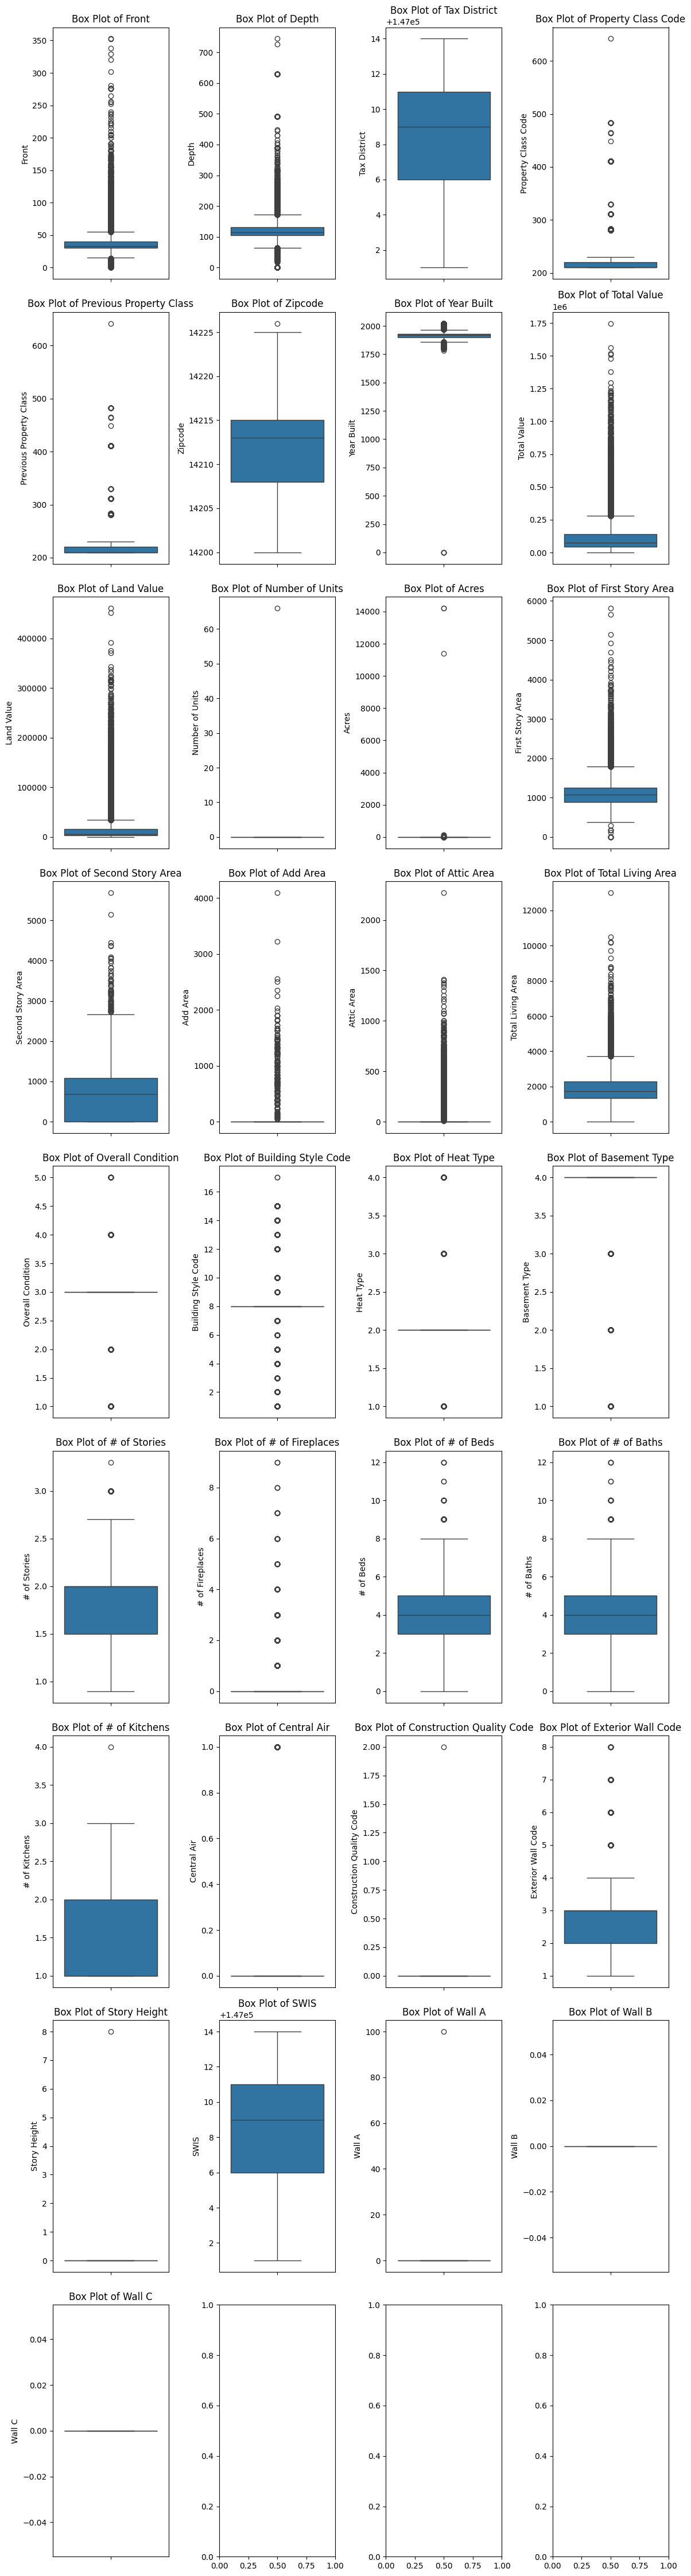

In [27]:
numerical_columns = df_dropped.select_dtypes(include='number').columns

num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten()

# Plot box plots for each numerical feature
for i, column in enumerate(numerical_columns):
    sb.boxplot(y=df_dropped[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [28]:
outlierImputeCols = ['Front', 'Depth', 'Number of Units', 'Acres', 'Year Built', 'First Story Area', 'Second Story Area', 'Add Area', 'Attic Area', 'Total Living Area']
df_imputed = outlierRemoval(df_dropped, outlierImputeCols)

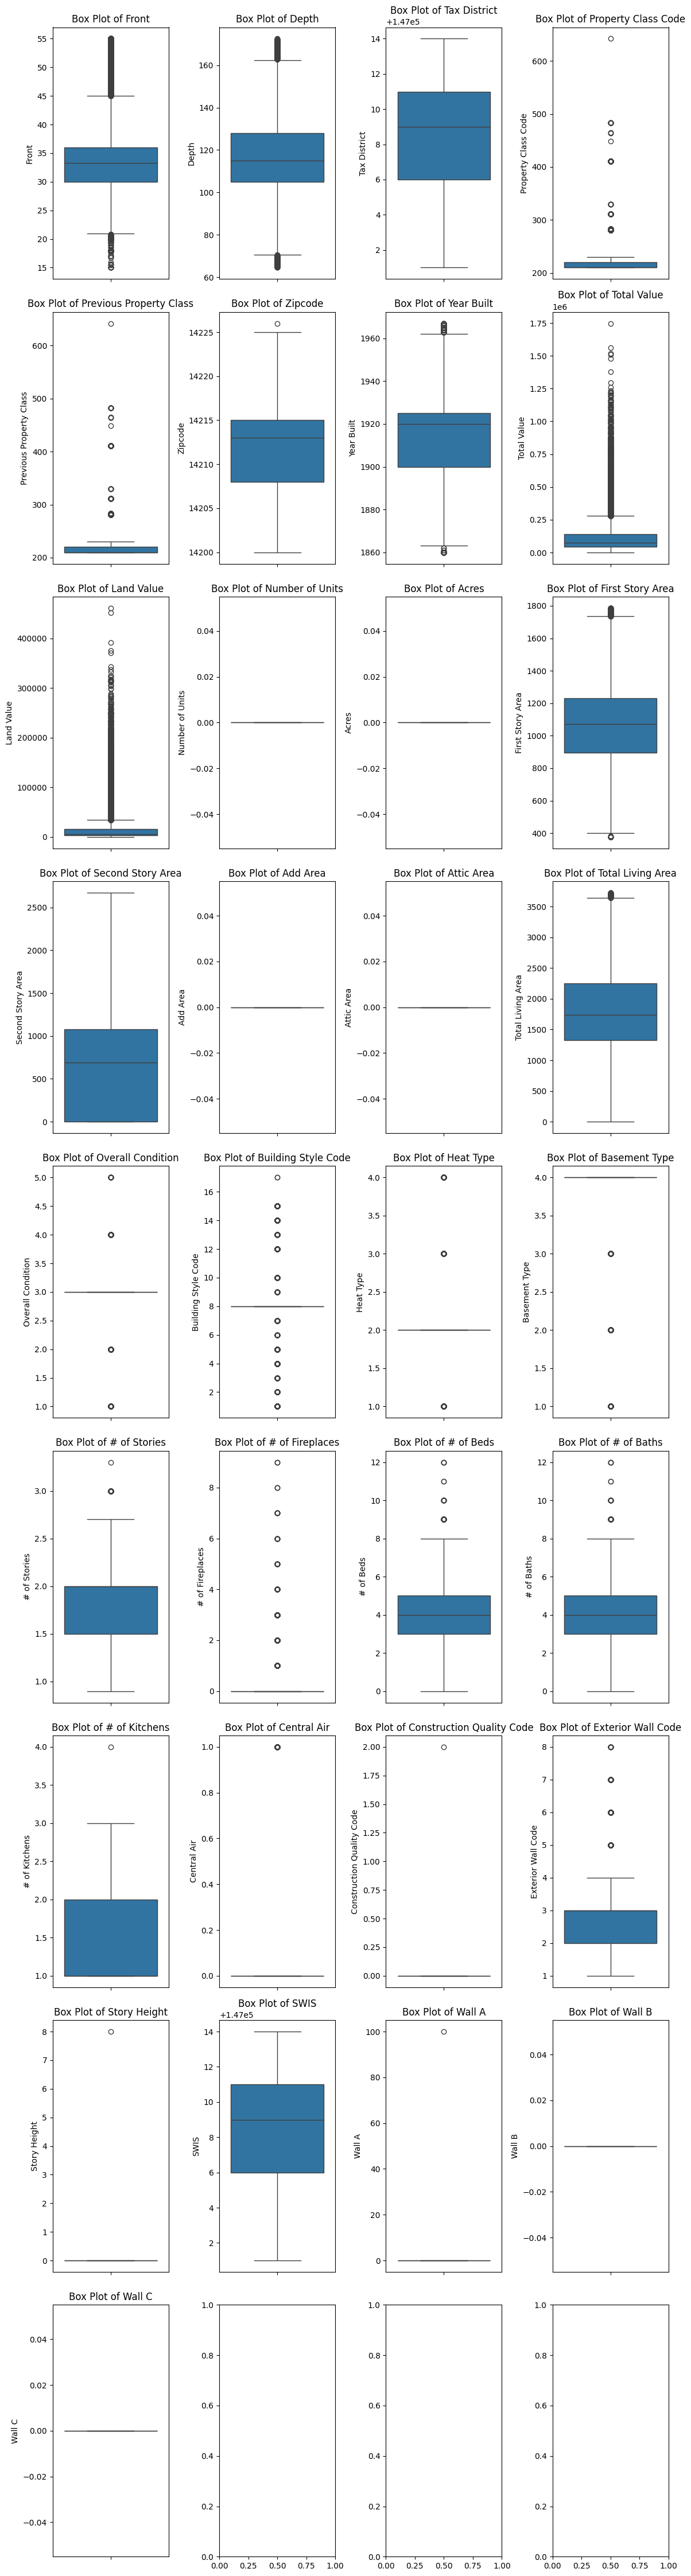

In [29]:
numerical_columns = df_imputed.select_dtypes(include='number').columns

num_cols = 4
num_rows = math.ceil(len(numerical_columns) / num_cols)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten()

# Plot box plots for each numerical feature
for i, column in enumerate(numerical_columns):
    sb.boxplot(y=df_imputed[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [30]:
df_imputed = pd.get_dummies(df_imputed, columns = df_imputed.select_dtypes(include='object').columns, dtype=int)

In [31]:
df_imputed.head()

,Front,Depth,Tax District,Property Class Code,Previous Property Class,Zipcode,Year Built,Total Value,Land Value,Number of Units,...,Construction Grade_C,Construction Grade_D,Construction Grade_E,Homestead Code_H,Homestead Code_N,Overall Condition Description_Excellent,Overall Condition Description_Fair,Overall Condition Description_Good,Overall Condition Description_Normal,Overall Condition Description_Poor
10,52.00,115.0,147004,210.0,210.0,14212.0,1920.0,105000,3100,0,...,1,0,0,1,0,0,0,1,0,0
11,30.00,121.0,147010,220.0,220.0,14215.0,1917.0,33000,2100,0,...,1,0,0,1,0,0,0,0,1,0
13,30.00,113.0,147012,210.0,210.0,14206.0,1920.0,72000,6000,0,...,1,0,0,1,0,0,0,0,1,0
15,33.33,115.0,147014,210.0,210.0,14210.0,1910.0,112000,7000,0,...,1,0,0,1,0,0,0,0,1,0
16,35.00,104.5,147008,220.0,220.0,14207.0,1925.0,83000,6000,0,...,1,0,0,1,0,0,0,0,1,0


In [32]:
df_imputed.shape

(67443, 71)

In [33]:
cleanedCorrMatrix = df_imputed.corr().abs()
cleanedCorrMatrix

,Front,Depth,Tax District,Property Class Code,Previous Property Class,Zipcode,Year Built,Total Value,Land Value,Number of Units,...,Construction Grade_C,Construction Grade_D,Construction Grade_E,Homestead Code_H,Homestead Code_N,Overall Condition Description_Excellent,Overall Condition Description_Fair,Overall Condition Description_Good,Overall Condition Description_Normal,Overall Condition Description_Poor
Front,1.000000,0.079447,0.122933,0.048364,0.048364,0.193939,0.330072,0.240151,0.209938,NaN,...,0.141688,0.174533,0.012469,0.014387,0.014387,0.000181,0.099715,0.083191,0.023923,0.044766
Depth,0.079447,1.000000,0.032370,0.016917,0.016917,0.166838,0.025631,0.158731,0.156755,NaN,...,0.054975,0.078838,0.006033,0.012545,0.012545,0.000172,0.036873,0.031328,0.052526,0.016563
Tax District,0.122933,0.032370,1.000000,0.151421,0.151421,0.368354,0.386474,0.180322,0.150824,NaN,...,0.171491,0.124831,0.009871,0.095267,0.095267,0.014452,0.088164,0.168858,0.191298,0.035309
Property Class Code,0.048364,0.016917,0.151421,1.000000,1.000000,0.069391,0.043011,0.022396,0.037421,NaN,...,0.043195,0.016983,0.004882,0.861319,0.861319,0.001477,0.005667,0.080632,0.067685,0.024756
Previous Property Class,0.048364,0.016917,0.151421,1.000000,1.000000,0.069391,0.043011,0.022396,0.037421,NaN,...,0.043195,0.016983,0.004882,0.861319,0.861319,0.001477,0.005667,0.080632,0.067685,0.024756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Overall Condition Description_Excellent,0.000181,0.000172,0.014452,0.001477,0.001477,0.009999,0.006597,0.061349,0.045852,NaN,...,0.019643,0.005078,0.000342,0.001655,0.001655,1.000000,0.003843,0.003853,0.048329,0.001461
Overall Condition Description_Fair,0.099715,0.036873,0.088164,0.005667,0.005667,0.088516,0.117201,0.137792,0.075466,NaN,...,0.113032,0.145472,0.012063,0.021869,0.021869,0.003843,1.000000,0.052555,0.659121,0.019925
Overall Condition Description_Good,0.083191,0.031328,0.168858,0.080632,0.080632,0.058542,0.008719,0.308015,0.188506,NaN,...,0.085740,0.052257,0.001340,0.108316,0.108316,0.003853,0.052555,1.000000,0.660875,0.019978
Overall Condition Description_Normal,0.023923,0.052526,0.191298,0.067685,0.067685,0.112349,0.102464,0.104219,0.071982,NaN,...,0.157253,0.084309,0.028145,0.058865,0.058865,0.048329,0.659121,0.660875,1.000000,0.250559


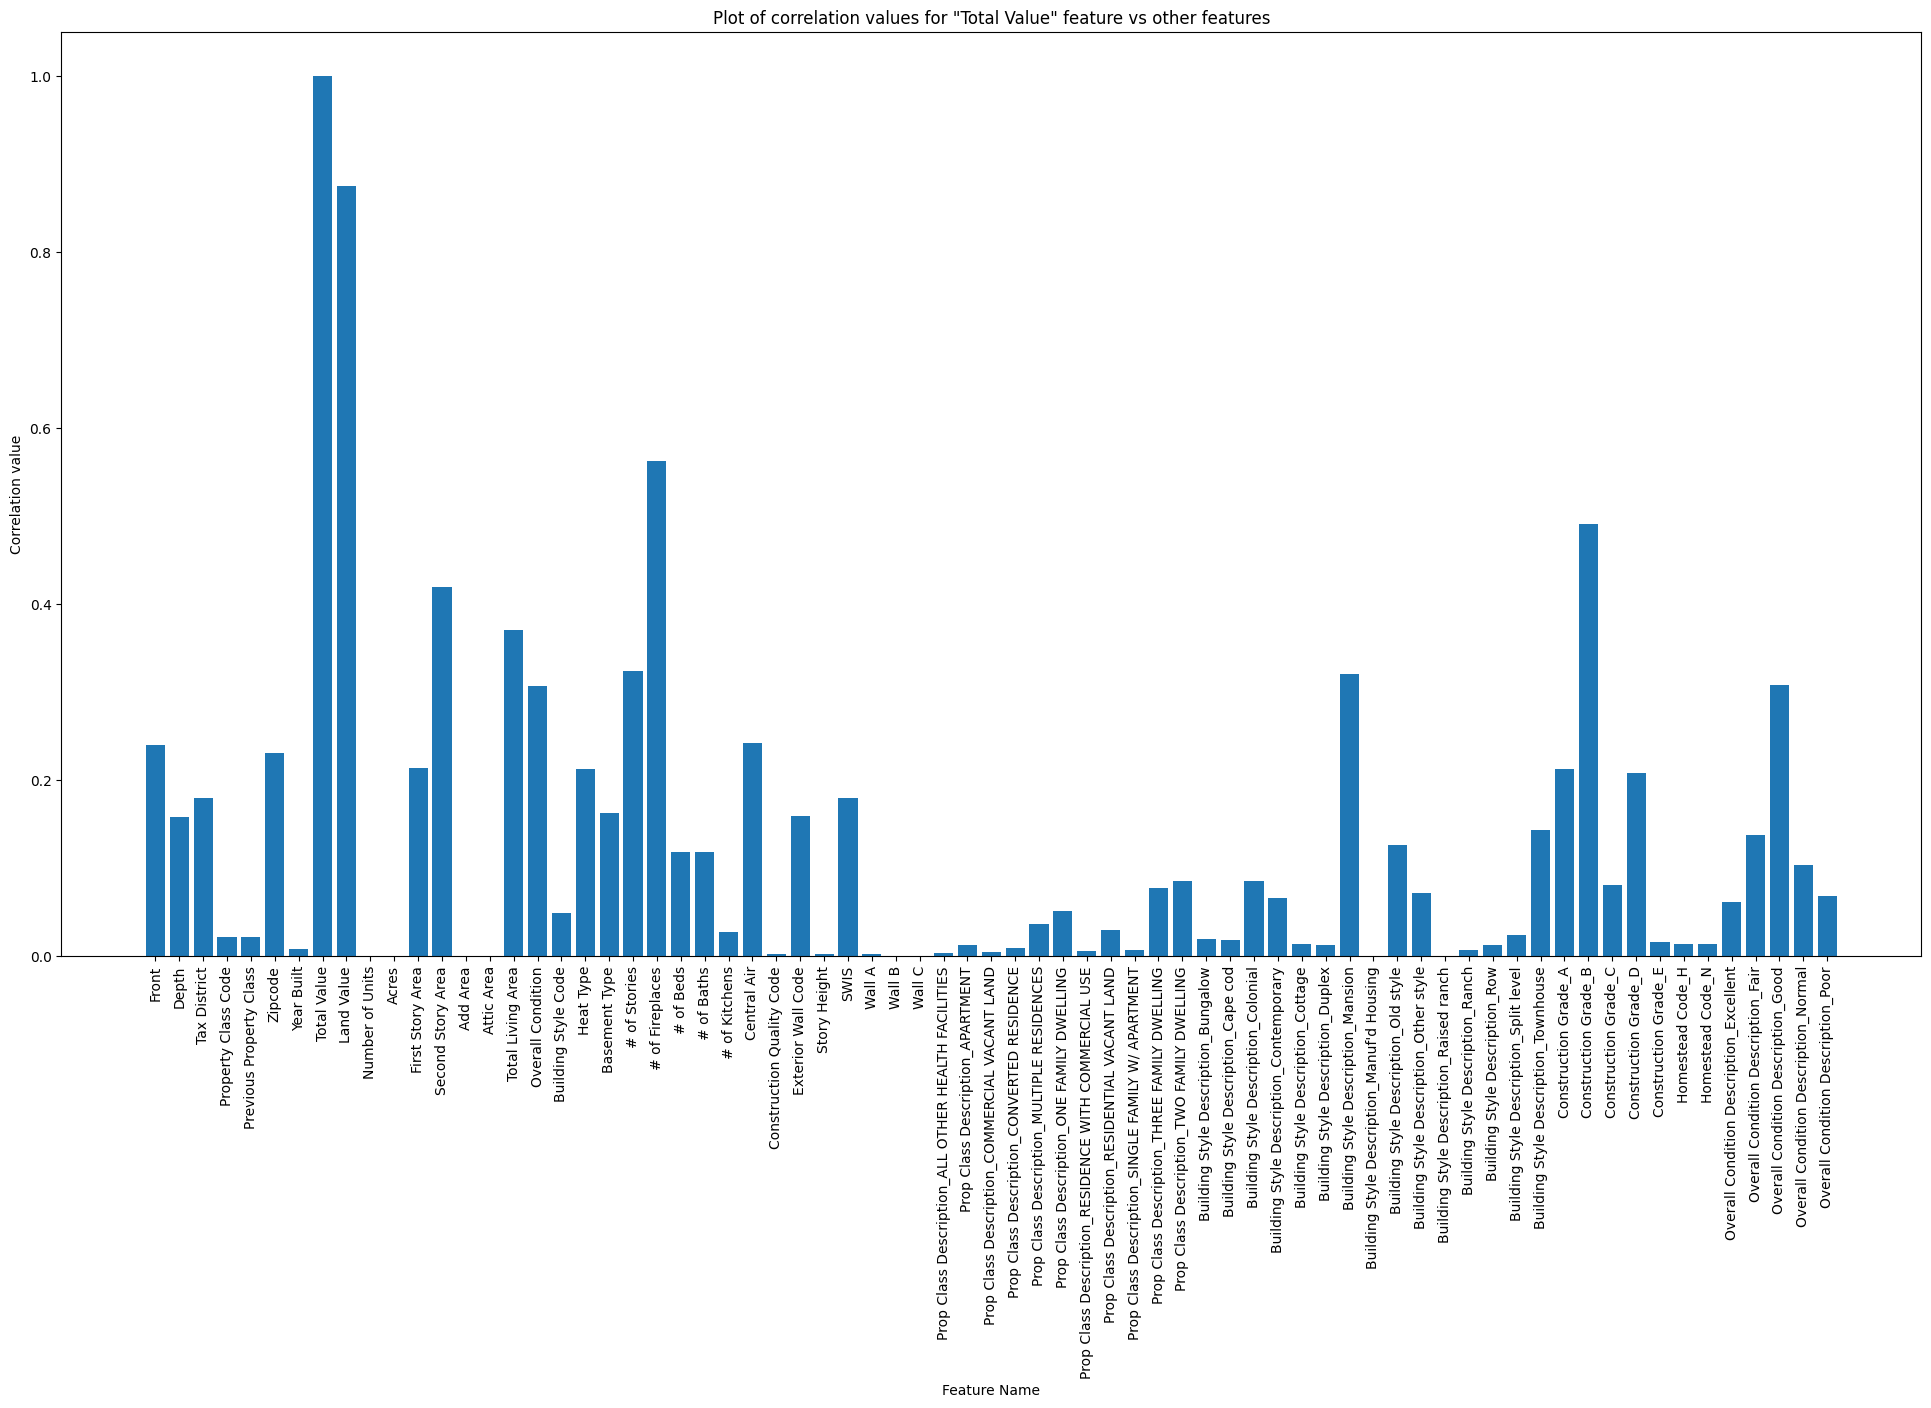

In [34]:
'''
Correlation graph for price feature vs other features
'''
fig = plt.figure(figsize=(24, 12))
plt.bar(cleanedCorrMatrix['Total Value'].index,cleanedCorrMatrix['Total Value'])
plt.xlabel("Feature Name")
plt.ylabel("Correlation value")
plt.title("Plot of correlation values for \"Total Value\" feature vs other features")
plt.xticks(rotation=90)
plt.show()

In [35]:
df_cleaned = df_imputed.drop(columns = ['Property Class Code', 'Previous Property Class', 'Year Built', 'Number of Units', 'Acres', 'Add Area', 'Attic Area', 'Building Style Code', '# of Kitchens', 'Construction Quality Code', 'Story Height', 'Wall A', 'Wall B', 'Wall C'])

In [36]:
df_cleaned.shape

(67443, 57)

In [37]:
df_train = df_cleaned.sample(frac = 0.8)
df_test_valid = df_cleaned.drop(index = df_train.index)
df_test = df_test_valid.sample(frac = 0.5)
df_valid = df_test_valid.drop(index = df_test.index)

In [38]:
y_train = df_train['Total Value']
y_test = df_test['Total Value']
y_valid = df_valid['Total Value']

In [39]:
x_train = df_train.drop(columns = ['Total Value'])
x_test = df_test.drop(columns = ['Total Value'])
x_valid = df_valid.drop(columns = ['Total Value'])

In [40]:
print("X_train dimensions : {0} and Y_train dimensions : {1}".format(x_train.shape,y_train.shape))
print("X_test dimensions : {0} and Y_test dimensions : {1}".format(x_test.shape,y_test.shape))
print("X_valid dimensions : {0} and Y_valid dimensions : {1}".format(x_valid.shape,y_valid.shape))

X_train dimensions : (53954, 56) and Y_train dimensions : (53954,)
X_test dimensions : (6744, 56) and Y_test dimensions : (6744,)
X_valid dimensions : (6745, 56) and Y_valid dimensions : (6745,)


In [41]:
numeric_columns = x_train.select_dtypes(include='number').columns

# Create MinMaxScaler
x_scaler = MinMaxScaler()

# Normalize the numeric features
x_train[numeric_columns] = x_scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = x_scaler.transform(x_test[numeric_columns])
x_valid[numeric_columns] = x_scaler.transform(x_valid[numeric_columns])

In [42]:
y_test = y_test.reset_index(drop=True)

sorted_indices = np.argsort(y_test)

y_test = y_test[sorted_indices]

## Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

linearRegrModel = LinearRegression().fit(x_train, y_train)
print('Linear Regression Coefficients: ',linearRegrModel.coef_)
print('Linear Regression Intercept: ', linearRegrModel.intercept_)

Linear Regression Coefficients:  [ 1.36504736e+04  5.08284225e+03  1.88123717e+15  1.72720866e+04
  1.21428948e+06  1.63871031e+04  4.17205353e+04  5.97896081e+04
  6.39859576e+15  1.36949379e+04  1.48859954e+04  1.19303037e+04
  1.17868746e+05  2.18571666e+15 -2.18571666e+15  1.49923680e+04
 -1.21493418e+04 -1.88123717e+15  1.75287356e+14  5.56924796e+14
  5.56924795e+14  5.56924796e+14  5.56924796e+14  5.56924796e+14
  5.56924796e+14  5.56924796e+14  5.56924796e+14  5.56924796e+14
  5.56924796e+14 -1.62062668e+16 -1.62062668e+16 -1.62062668e+16
 -1.62062668e+16 -1.62062668e+16 -1.62062668e+16 -1.62062668e+16
 -1.62062668e+16 -1.62062668e+16 -1.62062668e+16 -1.62062668e+16
 -1.62062668e+16 -1.62062668e+16 -1.62062668e+16 -1.62062668e+16
 -1.91865164e+16 -1.91865164e+16 -1.91865164e+16 -1.91865164e+16
 -1.91865164e+16 -2.14257325e+14 -2.14257325e+14 -1.21577282e+16
 -7.35878140e+15 -1.05580793e+16 -8.95843034e+15 -5.75913246e+15]
Linear Regression Intercept:  4.08092481969569e+16


In [45]:
y_test_pred_linear = linearRegrModel.predict(x_test)[sorted_indices]

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred_linear))
print("R2 Score: %.2f" % r2_score(y_test, y_test_pred_linear))

Mean squared error: 1652947065.86
R2 Score: 0.85


Text(0.5, 1.0, 'Predicted vs Actual Property Value for Test Dataset')

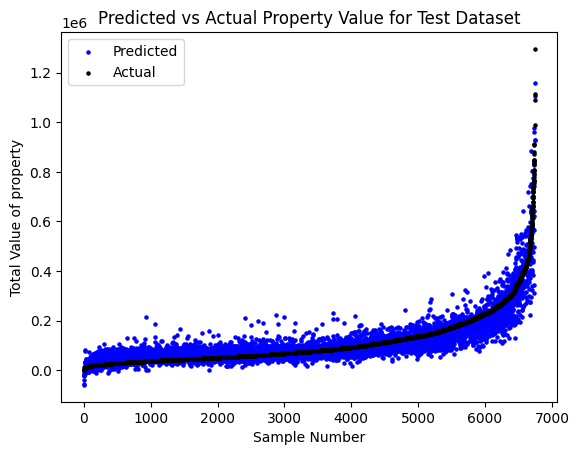

In [47]:
# Plot outputs
plt.scatter(range(len(y_test_pred_linear)), y_test_pred_linear, color="blue", s=5, label = 'Predicted')
plt.scatter(range(len(y_test)), y_test, color="black", s=5, label = 'Actual')
plt.xlabel('Sample Number')
plt.ylabel('Total Value of property')
plt.legend()
plt.title('Predicted vs Actual Property Value for Test Dataset')

## Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

ridgeRegrModel = Ridge(alpha = 0.5, max_iter = 10000).fit(x_train, y_train)
print('Ridge Regression Coefficients: ',ridgeRegrModel.coef_)
print('Ridge Regression Intercept: ', ridgeRegrModel.intercept_)

Ridge Regression Coefficients:  [ 1.38613550e+04  5.22108563e+03 -5.56073579e+03  1.78225389e+04
  1.20641432e+06  1.64095813e+04  4.22408029e+04  6.02834590e+04
  6.69775786e+04  1.38328394e+04  1.47947360e+04  1.16059608e+04
  1.19286810e+05 -8.63042161e+03 -8.63042161e+03  1.51000871e+04
 -1.23400283e+04 -5.56073579e+03  0.00000000e+00 -5.98239556e+04
 -2.92513164e+05  3.41820221e+04  8.93118801e+04  5.05149835e+04
  3.29132143e+04 -8.32906597e+03  7.45417025e+04  4.43225401e+04
  3.48798431e+04 -2.50009968e+04 -1.35446793e+04 -1.32311857e+04
 -7.03491468e+03 -1.19234004e+04 -1.30871225e+04  1.21533992e+05
 -6.08686202e+04 -2.22060065e+04  1.26457379e+05 -3.81708934e+03
 -2.11414723e+04 -2.31752052e+04 -1.87761107e+04 -1.41845673e+04
 -3.17896379e+04  5.54598779e+04 -3.99992380e+02 -8.18092827e+03
 -1.50893193e+04  9.27814043e+03 -9.27814043e+03  8.41320245e+04
 -3.80995233e+04  7.38099827e+03 -2.63306276e+04 -2.70828719e+04]
Ridge Regression Intercept:  -46599.477705491605


In [49]:
y_test_pred_ridge = ridgeRegrModel.predict(x_test)[sorted_indices]

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred_ridge))
print("R2 Score: %.2f" % r2_score(y_test, y_test_pred_ridge))

Mean squared error: 1651255779.59
R2 Score: 0.85


Text(0.5, 1.0, 'Predicted vs Actual Property Value for Test Dataset')

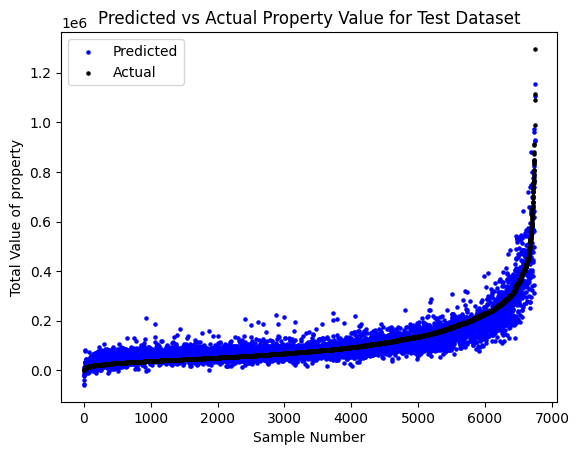

In [50]:
# Plot outputs
plt.scatter(range(len(y_test_pred_ridge)), y_test_pred_ridge, color="blue", s=5, label = 'Predicted')
plt.scatter(range(len(y_test)), y_test, color="black", s=5, label = 'Actual')
plt.xlabel('Sample Number')
plt.ylabel('Total Value of property')
plt.legend()
plt.title('Predicted vs Actual Property Value for Test Dataset')

## Lasso Regression

In [51]:
from sklearn.linear_model import Lasso

lassoRegrModel = Lasso(alpha = 0.5, max_iter = 10000).fit(x_train, y_train)
print('Lasso Regression Coefficients: ',lassoRegrModel.coef_)
print('Lasso Regression Intercept: ', lassoRegrModel.intercept_)

Lasso Regression Coefficients:  [ 1.36003157e+04  5.07512905e+03 -1.08824408e+04  1.72660525e+04
  1.21414920e+06  1.63169934e+04  4.17393832e+04  5.98458741e+04
  1.04907193e+05  1.36781286e+04  1.48620226e+04  1.18345176e+04
  1.17745854e+05 -1.68739761e+04 -3.75208187e-10  1.49983631e+04
 -1.21389009e+04 -1.35045899e+00  0.00000000e+00 -1.12399788e+05
 -3.84721273e+05 -1.42745379e+04  5.44742771e+04  1.55113913e+04
 -1.80392553e+03 -4.26340950e+04  4.22317614e+04  9.34067501e+03
  4.74761377e-02 -1.11810154e+04 -0.00000000e+00  3.81835737e+02
  4.37327769e+03  7.65070532e+02  3.82847854e+02  1.33711546e+05
 -4.91998424e+04 -8.61055108e+03  1.41137607e+05  9.46827297e+03
 -7.58874854e+03 -9.34799997e+03 -5.12752700e+03 -7.52770623e+02
 -2.52291179e+04  6.28176001e+04  7.75542648e+03  0.00000000e+00
 -6.08995537e+03  1.61473273e+03 -1.97051667e-11  7.42297396e+04
 -2.04281300e+04  6.03808955e+03 -1.81930548e+04  0.00000000e+00]
Lasso Regression Intercept:  -52626.16156955778


In [52]:
y_test_pred_lasso = lassoRegrModel.predict(x_test)[sorted_indices]

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred_lasso))
print("R2 Score: %.2f" % r2_score(y_test, y_test_pred_lasso))

Mean squared error: 1652348777.74
R2 Score: 0.85


Text(0.5, 1.0, 'Predicted vs Actual Property Value for Test Dataset')

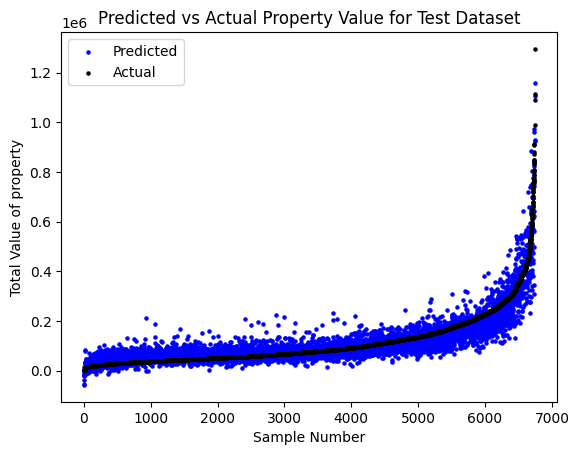

In [54]:
# Plot outputs
plt.scatter(range(len(y_test_pred_lasso)), y_test_pred_lasso, color="blue", s=5, label = 'Predicted')
plt.scatter(range(len(y_test)), y_test, color="black", s=5, label = 'Actual')
plt.xlabel('Sample Number')
plt.ylabel('Total Value of property')
plt.legend()
plt.title('Predicted vs Actual Property Value for Test Dataset')

## PyTorch NN Model with Training Loop from Scratch

In [55]:
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchinfo
import datetime
from torch.utils.data import DataLoader, TensorDataset

In [56]:
lr=0.01
num_epochs = 100
batch_size = 32
in_features_count = x_train.shape[1]

In [57]:
y_scaler = MinMaxScaler()

y_train_norm = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_norm = y_scaler.transform(y_test.values.reshape(-1,1))
y_valid_norm = y_scaler.transform(y_valid.values.reshape(-1,1))

In [58]:
trainDataset = TensorDataset(torch.from_numpy(x_train.to_numpy()).float(), torch.from_numpy(y_train_norm.reshape(-1,1)).float())
trainLoader = DataLoader(trainDataset, batch_size = batch_size, shuffle = True)

In [59]:
validationDataset = TensorDataset(torch.from_numpy(x_valid.to_numpy()).float(), torch.from_numpy(y_valid_norm.reshape(-1,1)).float())
validationLoader = DataLoader(validationDataset, batch_size = batch_size)

In [60]:
testDataset = TensorDataset(torch.from_numpy(x_test.to_numpy()).float(), torch.from_numpy(y_test_norm.reshape(-1,1)).float())
testLoader = DataLoader(testDataset, batch_size = batch_size)

In [65]:
class ModelTrial():
    def __init__(self, model, criterion, optimizer, y_scaler):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.train_metrics = {'loss': []}
        self.validation_metrics = {'loss': []}
        self.test_metrics = {'loss': []}
        self.train_time = None
        self.epochs = []
        self.test_outputs = {}
        self.y_scaler = y_scaler
    def printModel(self):
        print(self.model)
    def printModelSummary(self, batch_size):
        print(torchinfo.summary(self.model, input_size = (batch_size, self.model.in_features_count)))
    def trainingLoop(self, trainLoader, validationLoader, testLoader, num_epochs, verbose = True):
        self.epochs = range(1, num_epochs+1)
        cumulative_train_time = datetime.timedelta()
        train_dataset_size = len(trainLoader.dataset)
        test_dataset_size = len(testLoader.dataset)
        validation_dataset_size = len(validationLoader.dataset)

        for epoch in self.epochs:
            training_loss = 0.0
            t1 = datetime.datetime.now()
            self.model.train()
            for inputs, labels in trainLoader:
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                training_loss += loss.item() / (train_dataset_size / trainLoader.batch_size)

            t2 = datetime.datetime.now()
            cumulative_train_time += t2-t1

            if verbose:
                print(f"Epoch {epoch}, Training Loss: {training_loss:.5f}")
            self.train_metrics['loss'].append(training_loss)
            # Validation loop
            validation_loss = 0.0
            self.model.eval()
            with torch.no_grad():  # Disable gradient computation
                for inputs, labels in validationLoader:
                    outputs = self.model(inputs)
                    loss = self.criterion(outputs, labels)
                    validation_loss += loss.item() / (validation_dataset_size / validationLoader.batch_size)

                if verbose:
                    print(f"Epoch {epoch}, Validation Loss: {validation_loss:.5f}")
                self.validation_metrics['loss'].append(validation_loss)

        self.model.eval()
        for epoch in self.epochs:
            test_loss = 0.0
            with torch.no_grad():
                for inputs, labels in testLoader:
                    outputs = self.model(inputs)
                    loss = self.criterion(outputs, labels)
                    test_loss += loss.item() / (test_dataset_size / testLoader.batch_size)

                self.test_metrics['loss'].append(test_loss)
        print(f"Epoch {epoch} Training Completed!!")
        print(f"Epoch {epoch}, Testing Loss: {test_loss:.5f}")
        self.train_time = cumulative_train_time

    def testDatasetPass(self, X_test, y_test):
        self.model.eval()
        test_dataset_size = X_test.shape[0]
        inputs = torch.from_numpy(X_test.to_numpy()).float()
        labels = torch.from_numpy(y_test.reshape(-1,1)).float()
        with torch.no_grad():
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
        self.test_outputs['labels'] = self.y_scaler.inverse_transform(labels)
        self.test_outputs['outputs'] = self.y_scaler.inverse_transform(outputs)[sorted_indices]

        test_loss = mean_squared_error(self.test_outputs['labels'], self.test_outputs['outputs'])
        r2_score_val = r2_score(self.test_outputs['labels'], self.test_outputs['outputs'])
        self.test_outputs['loss'] = test_loss
        self.test_outputs['R2Score'] = r2_score_val
        print("Test Dataset Passed !! Loss : {} R2 Score : {}".format(test_loss, r2_score_val))

    def printTrainTimeStatistics(self):
        print("Time taken to train model (train phase alone considered) is : ")
        days = self.train_time.days
        seconds = self.train_time.seconds
        microseconds = self.train_time.microseconds
        hours, remainder = divmod(seconds, 3600)
        minutes, seconds = divmod(remainder, 60)
        print(f"Days: {days}, Hours: {hours}, Minutes: {minutes}, Seconds: {seconds}, Microseconds: {microseconds}")

    def plotLossVsEpochs(self):
        fig = plt.figure()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')

        plt.plot(self.epochs, self.test_metrics['loss'], label = 'Test')
        plt.plot(self.epochs, self.validation_metrics['loss'], label = 'Validation')
        plt.plot(self.epochs, self.train_metrics['loss'], label = 'Train')

        plt.title('Loss vs Epochs graph for Train, Test and Validation Dataset')
        plt.legend()
        plt.show()

    def plotPredVsActual(self):
        # Plot outputs
        plt.scatter(range(len(self.test_outputs['outputs'])), self.test_outputs['outputs'], color="blue", s=5, label = 'Predicted')
        plt.scatter(range(len(self.test_outputs['labels'])), self.test_outputs['labels'], color="black", s=5, label = 'Actual')
        plt.xlabel('Sample Number')
        plt.ylabel('Total Value of property')
        plt.legend()
        plt.title('Predicted vs Actual Property Value for Test Dataset')

    def saveModel(self, path):
        torch.save(self.model.state_dict(), path)

In [72]:
class BaseNet(nn.Module):
    def __init__(self, in_features_count):
        super(BaseNet, self).__init__()
        self.fc1 = nn.Linear(in_features_count, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,8)
        self.fc7 = nn.Linear(8,1)
        self.in_features_count = in_features_count
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.fc7(x)
        return x

In [73]:
baseNet = BaseNet(in_features_count = in_features_count)
criterion = nn.MSELoss()
optimizer = optim.SGD(baseNet.parameters(), lr = lr)

In [74]:
baseModel = ModelTrial(baseNet, criterion, optimizer, y_scaler)

In [75]:
baseModel.printModel()

BaseNet(
  (fc1): Linear(in_features=56, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=8, bias=True)
  (fc7): Linear(in_features=8, out_features=1, bias=True)
)


In [76]:
baseModel.printModelSummary(batch_size = batch_size)

Layer (type:depth-idx)                   Output Shape              Param #
BaseNet                                  [32, 1]                   --
├─Linear: 1-1                            [32, 256]                 14,592
├─Linear: 1-2                            [32, 128]                 32,896
├─Linear: 1-3                            [32, 64]                  8,256
├─Linear: 1-4                            [32, 32]                  2,080
├─Linear: 1-5                            [32, 16]                  528
├─Linear: 1-6                            [32, 8]                   136
├─Linear: 1-7                            [32, 1]                   9
Total params: 58,497
Trainable params: 58,497
Non-trainable params: 0
Total mult-adds (M): 1.87
Input size (MB): 0.01
Forward/backward pass size (MB): 0.13
Params size (MB): 0.23
Estimated Total Size (MB): 0.37


In [77]:
baseModel.trainingLoop(trainLoader, validationLoader, testLoader, num_epochs)

Epoch 1, Training Loss: 0.00426
Epoch 1, Validation Loss: 0.00388
Epoch 2, Training Loss: 0.00366
Epoch 2, Validation Loss: 0.00387
Epoch 3, Training Loss: 0.00365
Epoch 3, Validation Loss: 0.00385
Epoch 4, Training Loss: 0.00364
Epoch 4, Validation Loss: 0.00384
Epoch 5, Training Loss: 0.00363
Epoch 5, Validation Loss: 0.00384
Epoch 6, Training Loss: 0.00362
Epoch 6, Validation Loss: 0.00381
Epoch 7, Training Loss: 0.00361
Epoch 7, Validation Loss: 0.00381
Epoch 8, Training Loss: 0.00360
Epoch 8, Validation Loss: 0.00379
Epoch 9, Training Loss: 0.00358
Epoch 9, Validation Loss: 0.00377
Epoch 10, Training Loss: 0.00357
Epoch 10, Validation Loss: 0.00376
Epoch 11, Training Loss: 0.00355
Epoch 11, Validation Loss: 0.00373
Epoch 12, Training Loss: 0.00354
Epoch 12, Validation Loss: 0.00371
Epoch 13, Training Loss: 0.00353
Epoch 13, Validation Loss: 0.00369
Epoch 14, Training Loss: 0.00347
Epoch 14, Validation Loss: 0.00365
Epoch 15, Training Loss: 0.00344
Epoch 15, Validation Loss: 0.0036

In [78]:
baseModel.printTrainTimeStatistics()

Time taken to train model (train phase alone considered) is : 
Days: 0, Hours: 0, Minutes: 5, Seconds: 50, Microseconds: 20030


In [79]:
baseModel.testDatasetPass(x_test, y_test_norm)

Test Dataset Passed !! Loss : 1584718118.7929652 R2 Score : 0.8586298500854626


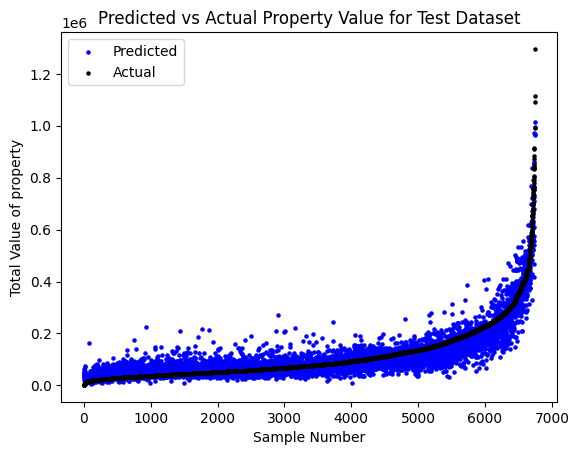

In [80]:
baseModel.plotPredVsActual()

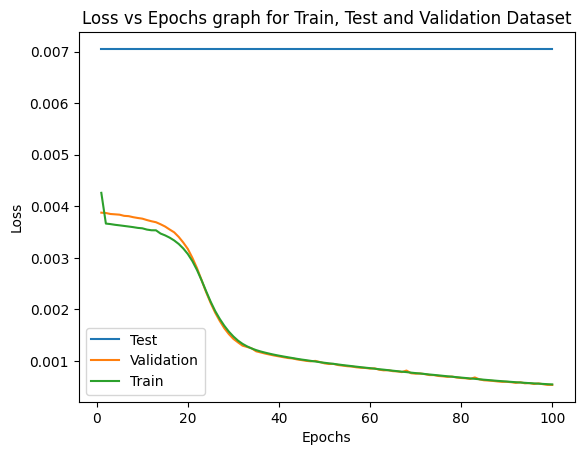

In [82]:
baseModel.plotLossVsEpochs()

### References
1) https://docs.python.org/3/index.html

2) https://matplotlib.org/stable/

3) https://seaborn.pydata.org/api.html

4) https://pandas.pydata.org/docs/reference/index.html

5) https://numpy.org/doc/stable/index.html

6) https://pytorch.org/docs/stable/index.html

7) https://github.com/TylerYep/torchinfo#readme

8) https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

9) https://torchmetrics.readthedocs.io/en/stable/

10) https://scikit-learn.org/stable/modules/classes.html